## Reference

https://github.com/NoahLidell/math-of-intelligence/blob/master/q_learning/cartpole_cnn_qlearning.ipynb

https://keon.io/deep-q-learning/

https://github.com/keon/deep-q-learning

In **Q-Learning** Algorithm, there is a function called **Q Function**, which is used to approximate the reward based on a state. We call it Q(s,a), where Q is a function which calculates the expected future value from state s and action a. 

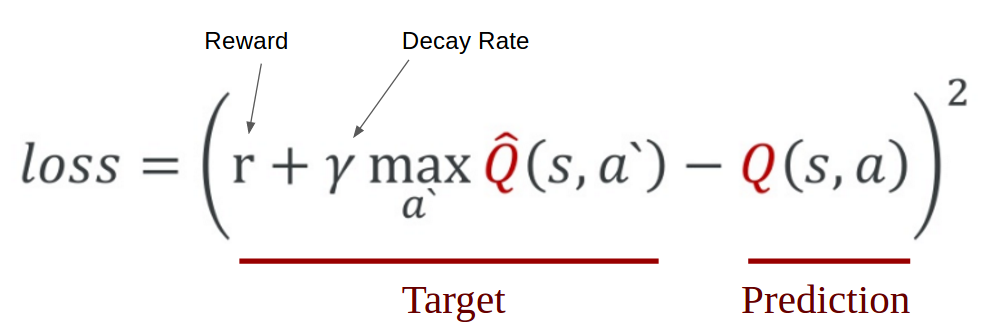

In [42]:
import random
import gym
import numpy as np
from collections import deque
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [43]:
# How many times to play the game
EPISODES = 10

In [44]:
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95    # discount rate
        self.epsilon = 1.0  # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = self._build_model()
        
    def _build_model(self):
        # Neural Net for Deep-Q learning Model
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation='relu'))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse',
                      optimizer=Adam(lr=self.learning_rate))
        return model
    
    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))
        
    def act(self, state):
        if np.random.rand() <= self.epsilon:
            # The agent acts randomly
            return random.randrange(self.action_size)
        
        # Predict the reward value based on the given state
        act_values = self.model.predict(state)
        
        # Pick the action based on the predicted reward
        return np.argmax(act_values[0])  

    def replay(self, batch_size):
        # Sample minibatch from the memory
        minibatch = random.sample(self.memory, batch_size)
       
        for state, action, reward, next_state, done in minibatch:
            target = reward
            
            if not done:
                # predict the future discounted reward
                target = (reward + self.gamma *
                          np.amax(self.model.predict(next_state)[0]))
                
            # make the agent to approximately map
            # the current state to future discounted reward
            # We'll call that target_f
            target_f = self.model.predict(state)
            target_f[0][action] = target
            
            # Train the Neural Net with the state and target_f
            self.model.fit(state, target_f, epochs=1, verbose=0)
            
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

In [45]:
env = gym.make('CartPole-v1')
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

agent = DQNAgent(state_size, action_size)    
done = False
batch_size = 32
max_score = 0

for e in range(EPISODES):
    frames = []
    state = env.reset()
    state = np.reshape(state, [1, state_size])
        
    for time in range(500):
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
            
        pix  = env.render(mode='rgb_array')
        frames.append(pix)
            
        reward = reward if not done else -10
            
        next_state = np.reshape(next_state, [1, state_size])
        agent.remember(state, action, reward, next_state, done)
        state = next_state
            
        if done:
            print("episode: {}/{}, score: {}, e: {:.2}"
                  .format(e, EPISODES, time, agent.epsilon))
            
            if time > max_score:
                max_score = time
                best = frames
                
            break
                
    if len(agent.memory) > batch_size:
        agent.replay(batch_size)
            
print("Best Score: {}".format(max_score))


[2017-08-21 08:02:00,977] Making new env: CartPole-v1


episode: 0/10, score: 27, e: 1.0
episode: 1/10, score: 26, e: 1.0
episode: 2/10, score: 12, e: 0.99
episode: 3/10, score: 13, e: 0.99
episode: 4/10, score: 16, e: 0.99
episode: 5/10, score: 14, e: 0.98
episode: 6/10, score: 32, e: 0.98
episode: 7/10, score: 12, e: 0.97
episode: 8/10, score: 12, e: 0.97
episode: 9/10, score: 12, e: 0.96
Best Score: 32



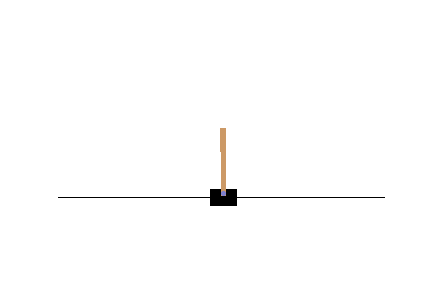
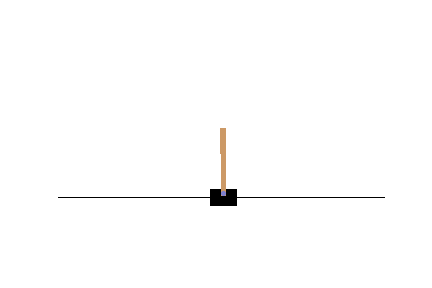
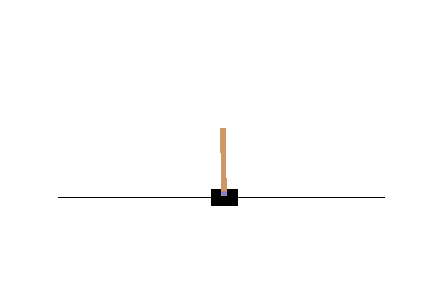
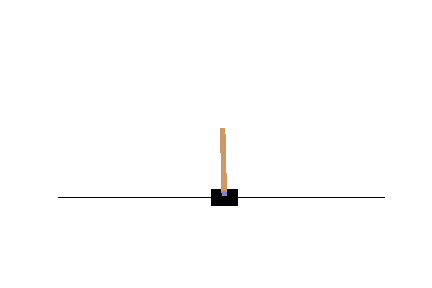
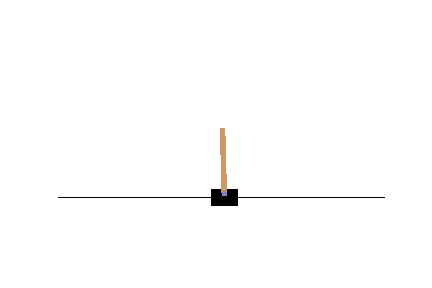
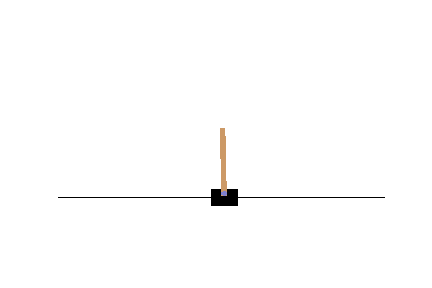
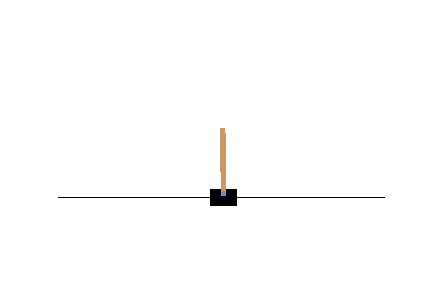
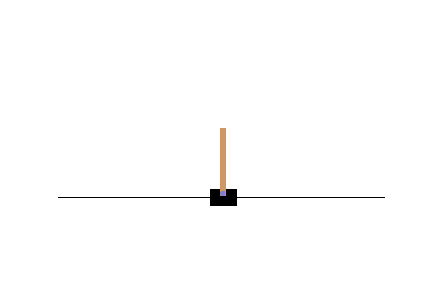
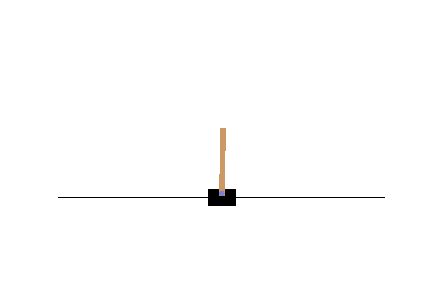
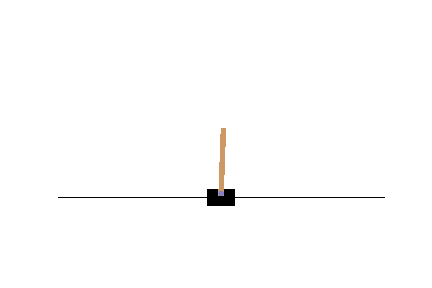
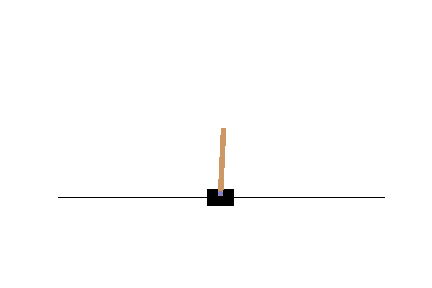
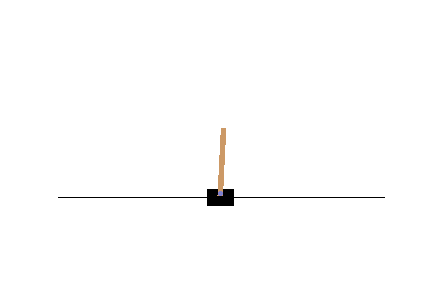
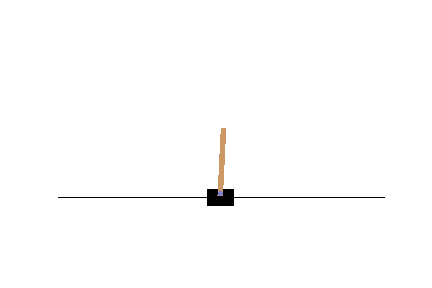
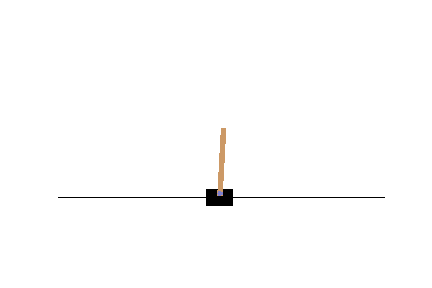
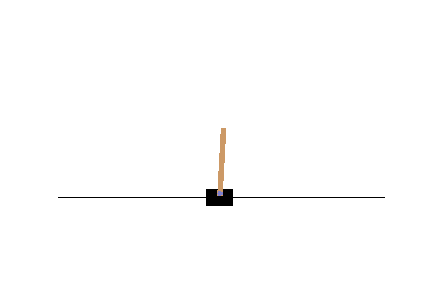
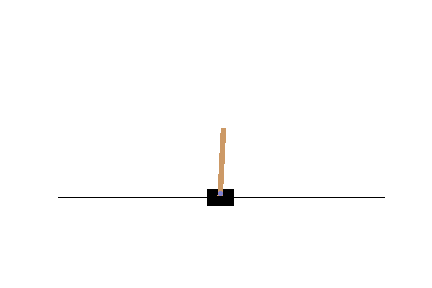
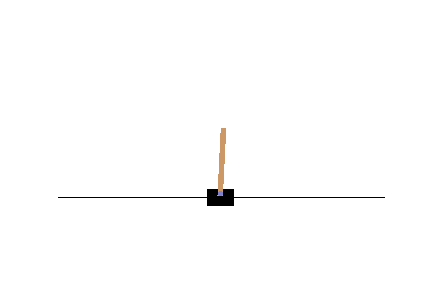
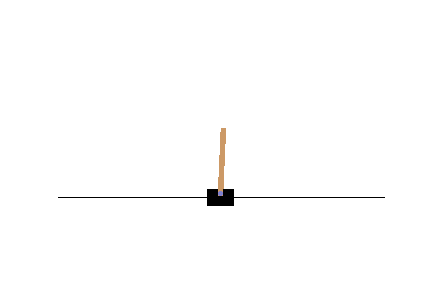
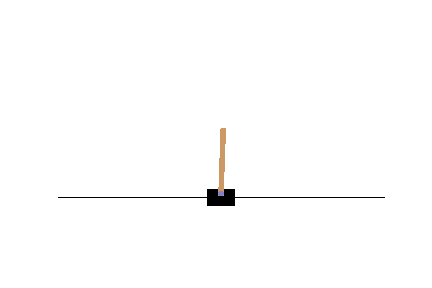
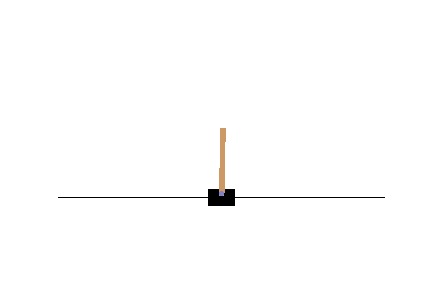
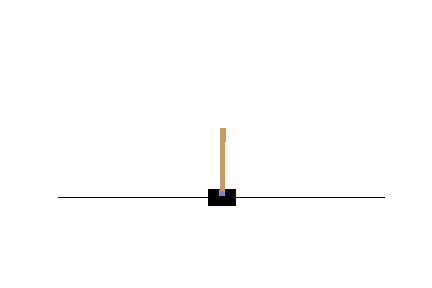
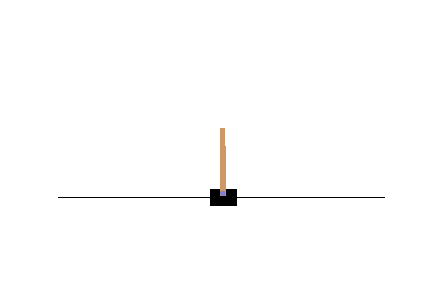
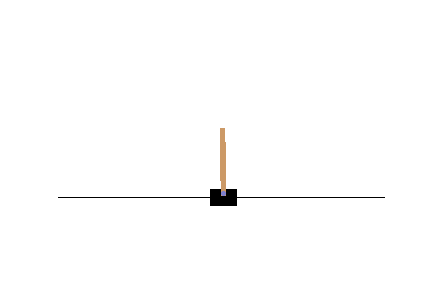
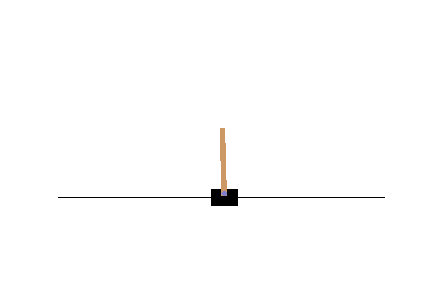
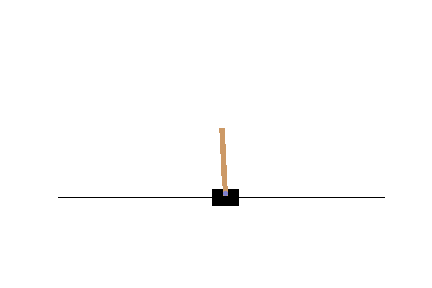
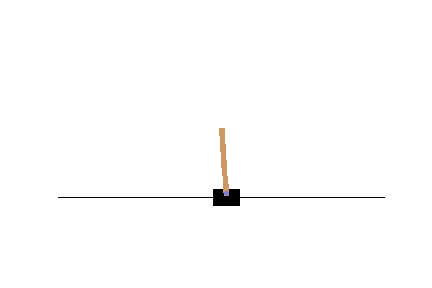
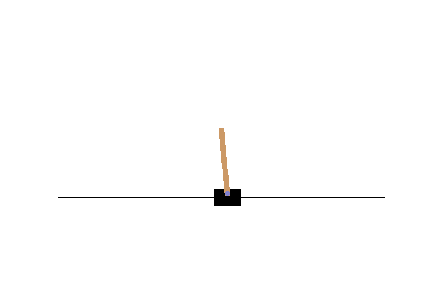
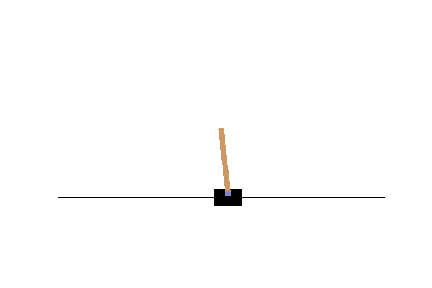
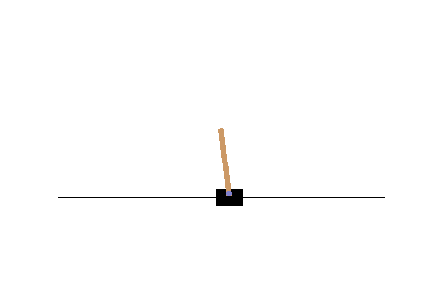
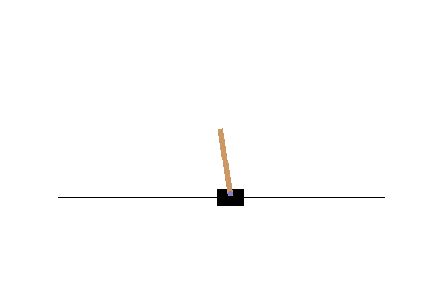
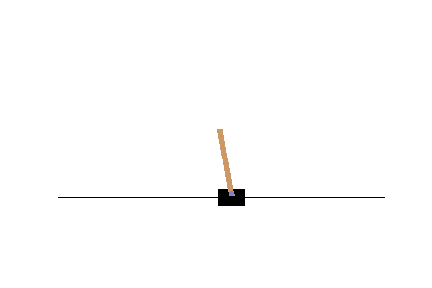
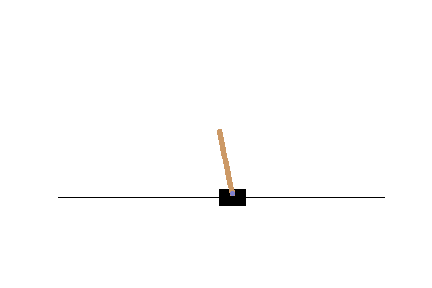
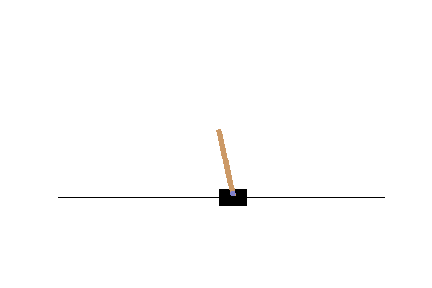

In [46]:
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython.display import display
import matplotlib.pyplot as plt

%matplotlib inline

def display_frames_as_gif(frames):
    # Displays a list of frames as a gif, with controls
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    display(display_animation(anim, default_mode='once'))

display_frames_as_gif(best)

In [40]:
import imageio
imageio.mimsave("/tmp/best.gif", best, 'GIF', duration=0.05)